# Turtle Channel

https://www.barchart.com/education/technical-indicators/turtle_channel

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-09-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-04,57.102501,57.294998,56.657501,57.090000,54.461620,109560400
2018-09-05,57.247501,57.417500,56.275002,56.717499,54.106274,133332000
2018-09-06,56.557499,56.837502,55.325001,55.775002,53.207172,137160000
2018-09-07,55.462502,56.342499,55.177502,55.325001,52.777882,150479200
2018-09-10,55.237499,55.462502,54.117500,54.582500,52.069561,158066000


In [3]:
period_upper = 14
period_lower = 14

# Calculate the Turtle Channel
df['High_Max'] = df['High'].rolling(window=period_upper, min_periods=1).max().shift(1)
df['Low_Min'] = df['Low'].rolling(window=period_lower, min_periods=1).min().shift(1)

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,High_Max,Low_Min
Date,,,,,,,,
2018-09-04,57.102501,57.294998,56.657501,57.090000,54.461620,109560400,NaN,NaN
2018-09-05,57.247501,57.417500,56.275002,56.717499,54.106274,133332000,57.294998,56.657501
2018-09-06,56.557499,56.837502,55.325001,55.775002,53.207172,137160000,57.417500,56.275002
2018-09-07,55.462502,56.342499,55.177502,55.325001,52.777882,150479200,57.417500,55.325001
2018-09-10,55.237499,55.462502,54.117500,54.582500,52.069561,158066000,57.417500,55.177502


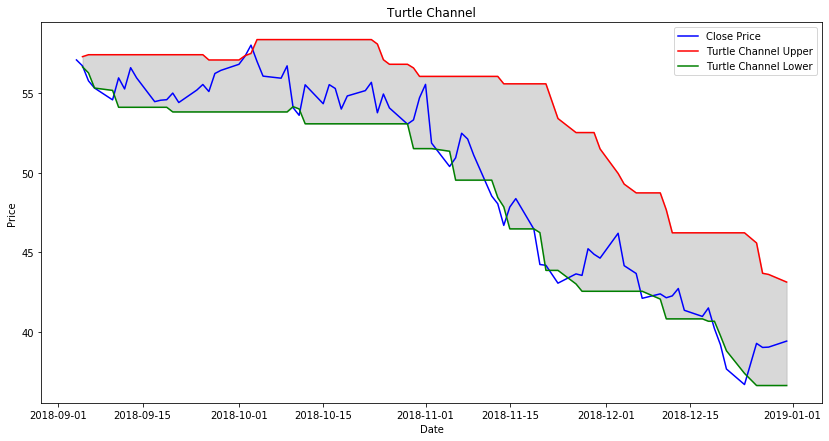

In [5]:
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['High_Max'], label='Turtle Channel Upper', color='red')
plt.plot(df.index, df['Low_Min'], label='Turtle Channel Lower', color='green')
plt.fill_between(df.index, df['High_Max'], df['Low_Min'], color='gray', alpha=0.3)
plt.title('Turtle Channel')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Candlestick with Turtle Channel

In [6]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,High_Max,Low_Min,VolumePositive
0,736941.0,57.102501,57.294998,56.657501,57.090000,54.461620,109560400,NaN,NaN,False
1,736942.0,57.247501,57.417500,56.275002,56.717499,54.106274,133332000,57.294998,56.657501,False
2,736943.0,56.557499,56.837502,55.325001,55.775002,53.207172,137160000,57.417500,56.275002,False
3,736944.0,55.462502,56.342499,55.177502,55.325001,52.777882,150479200,57.417500,55.325001,False
4,736947.0,55.237499,55.462502,54.117500,54.582500,52.069561,158066000,57.417500,55.177502,False


Text(0.5, 0, 'Date')

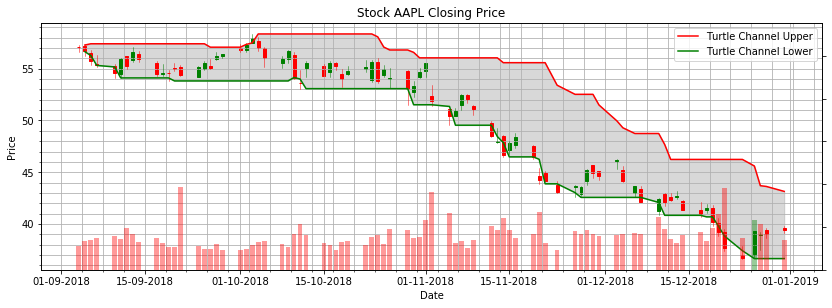

In [7]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df.index, df['High_Max'], label='Turtle Channel Upper', color='red')
ax1.plot(df.index, df['Low_Min'], label='Turtle Channel Lower', color='green')
ax1.fill_between(df.index, df['High_Max'], df['Low_Min'], color='gray', alpha=0.3)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.legend(loc='best')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

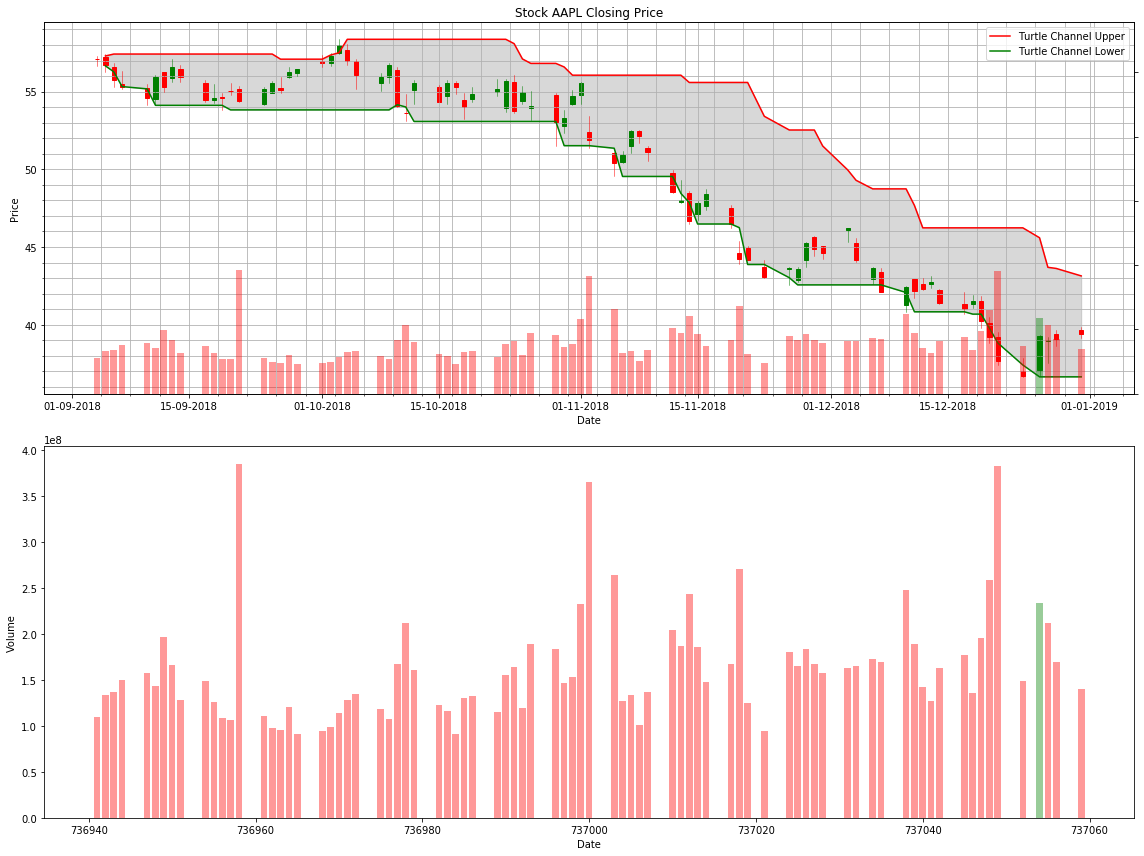

In [8]:
fig = plt.figure(figsize=(16,12))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df.index, df['High_Max'], label='Turtle Channel Upper', color='red')
ax1.plot(df.index, df['Low_Min'], label='Turtle Channel Lower', color='green')
ax1.fill_between(df.index, df['High_Max'], df['Low_Min'], color='gray', alpha=0.3)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.legend(loc='best')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

# Second subplot with Volume
ax2 = plt.subplot(2, 1, 2)
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax2.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')
plt.tight_layout()
plt.show()